Objective:

Devevelop a classification model usinf decision trees algorithm to predict the class of unknown patient or to find the proper drug for a new patient.

About the dataset:

You have data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.
The job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

In [2]:
#Import the libraries:
import pandas as pd
import numpy as np
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv("/content/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
df.size

1200

In [14]:
#The feature data
X = df[['Age','Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

#Convert the categorical variables to numerical variables:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(['LOW','NORMAL','HIGH'])
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3])

#The target data
y = df[['Drug']]

In [ ]:
X

In [15]:
#Setting up the decision trees algorithm:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3 , random_state =3)

In [18]:
#The train shape
print(X_trainset.shape)
print(y_trainset.shape)
#The test shape
print(X_testset.shape)
print(y_testset.shape)

(140, 5)
(140, 1)
(60, 5)
(60, 1)


In [ ]:
#Modeling
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

drugTree.fit(X_trainset, y_trainset)

#Test Prediction:
pred_Tree = drugTree.predict(X_testset)

#Compare the y_testset with the test prediction:
print(y_testset.values)
print(pred_Tree)

In [23]:
#Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt

#Accuracy score: If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0:
print("DecissionTrees's accuracy:", metrics.accuracy_score(y_testset, pred_Tree))

DecissionTrees's accuracy: 0.9833333333333333


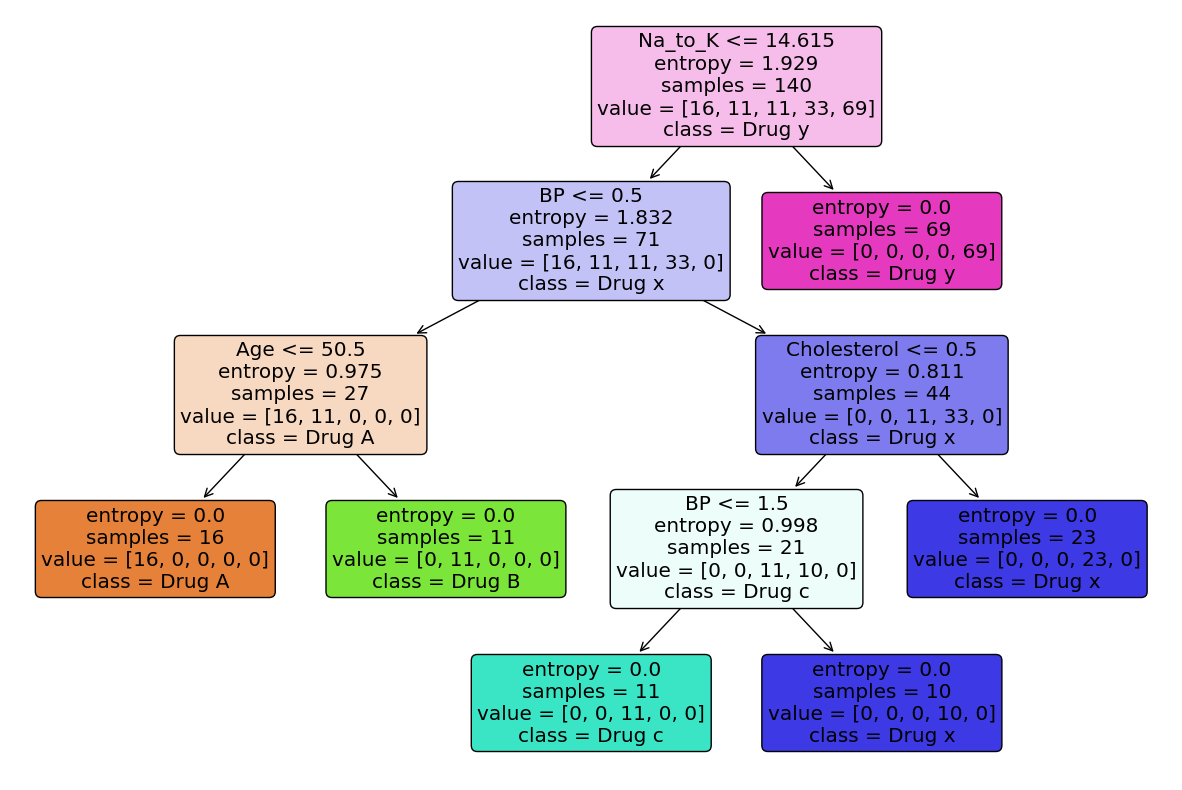

In [32]:
#visualize the tree
plt.figure(figsize=(15,10))
tree.plot_tree(drugTree, filled=True, rounded=True, class_names=['Drug A', 'Drug B', 'Drug c', 'Drug x', 'Drug y'], feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])
plt.show()

In [31]:
#predict the drug for a new patient:

New = [[31, 1, 2, 1, 11.876]]
pred_new = drugTree.predict(New)
print("The drug for the new patient is:", pred_new)

The drug for the new patient is: ['drugX']
